# X23 Group 4
## Project with Real Estate Dataset
### Christian Rodriguez, Emmanuel Salcedo, Ranjita Summan, Crystian Chavez


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from scipy.stats import zscore

# allow output to span multiple output lines in the console
pd.set_option('display.max_columns', 500)

Dataset Selection: We have chosen the USA Real Estate Dataset from Kaggle, which contains information about real estate properties in the USA.

https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset?resource=download

Google Drive is mounted to colab and placed into path /content/drive/MyDrive/realtor-data.csv.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Goal Definition: Goal is to build a system that predicts the cost of a home based on features such as footage, number of beds, and baths, on a per-state basis.

Feature Selection:In this case, the relevant features are "footage," "beds," and "baths." These features will be used to predict the cost of a home.

Preprocessing: Perform preprocessing steps on the dataset to prepare it for analysis. This may include handling missing values, encoding categorical variables, and scaling numerical features. Skipping this for now.

Exploration and Visualization: Here we are exploring the relationship between variables by using plots such as histograms, scatter plots, or box plots.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/realtor-data.csv')

df.head(10)

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0
6,for_sale,3.0,1.0,0.20,Ciales,Puerto Rico,639.0,2040.0,NaN,50000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,NaN,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,NaN,100000.0
9,for_sale,5.0,3.0,7.46,Las Marias,Puerto Rico,670.0,5403.0,NaN,300000.0


# New Section

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306000 entries, 0 to 305999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          306000 non-null  object 
 1   bed             250076 non-null  float64
 2   bath            251318 non-null  float64
 3   acre_lot        239877 non-null  float64
 4   city            305948 non-null  object 
 5   state           306000 non-null  object 
 6   zip_code        305803 non-null  float64
 7   house_size      252557 non-null  float64
 8   prev_sold_date  109589 non-null  object 
 9   price           306000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 23.3+ MB


In [ ]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,250076.000000,251318.000000,239877.000000,305803.000000,2.525570e+05,3.060000e+05
mean,3.491347,2.574726,9.732298,2552.165724,2.225678e+03,7.680924e+05
std,2.449591,2.568545,530.827190,1629.820335,3.665834e+03,1.297715e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,1.000000e+00
25%,2.000000,2.000000,0.160000,1605.000000,1.192000e+03,2.490000e+05
50%,3.000000,2.000000,0.430000,2151.000000,1.748000e+03,4.600000e+05
75%,4.000000,3.000000,1.590000,3052.000000,2.628000e+03,7.990000e+05
max,99.000000,198.000000,100000.000000,99999.000000,1.450112e+06,6.000000e+07


Running checks to see what columns have data missing and calculating the percentage in relation to total.


In [ ]:
missing_total = df.isna().sum()
print("# of items missing from columns")
print(missing_total)
print(" ")
missing_total_per = df.isna().sum()*100/len(df)
print("Percentage of items missing from columns")
print(missing_total_per)

# of items missing from columns
status                 0
bed                55924
bath               54682
acre_lot           66123
city                  52
state                  0
zip_code             197
house_size         53443
prev_sold_date    196411
price                  0
dtype: int64
 
Percentage of items missing from columns
status             0.000000
bed               18.275817
bath              17.869935
acre_lot          21.608824
city               0.016993
state              0.000000
zip_code           0.064379
house_size        17.465033
prev_sold_date    64.186601
price              0.000000
dtype: float64


Creating a simple scatter plot to view how the number of beds relates to the cost of a home. (Price of home in scientific notation)

Text(0.5, 1.0, 'Number of beds compared to price of homes')

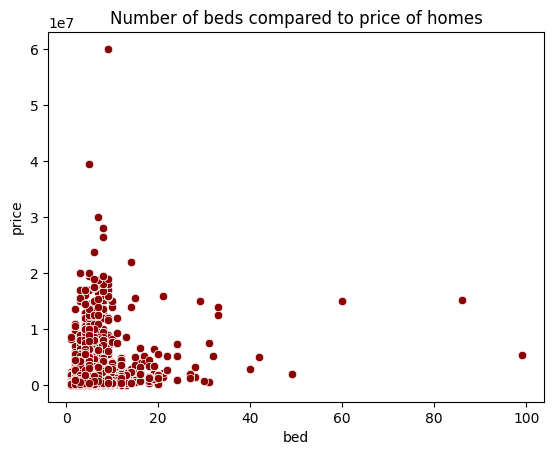

In [ ]:
sns.scatterplot(data=df, x='bed', y='price', color='darkred')
plt.title("Number of beds compared to price of homes")

Another scatterplot of number of baths related to price of home. (scientific notation)

<Axes: xlabel='bath', ylabel='price'>

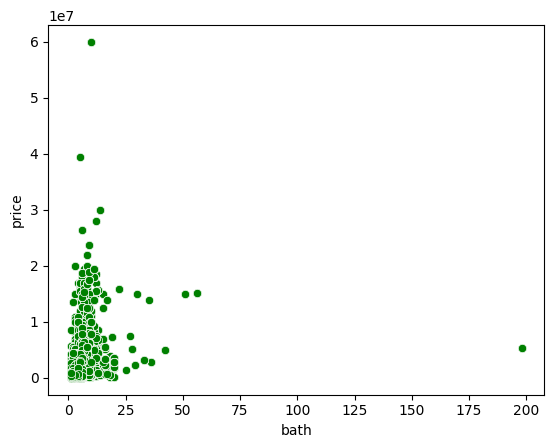

In [ ]:
sns.scatterplot(data=df, x='bath', y='price', color='green')

Using seaborn count plot to see the number of homes for sale per state. As we found, some states do not have homes for sale but just land only.

Text(0.5, 1.0, 'Number of homes for sale by state')

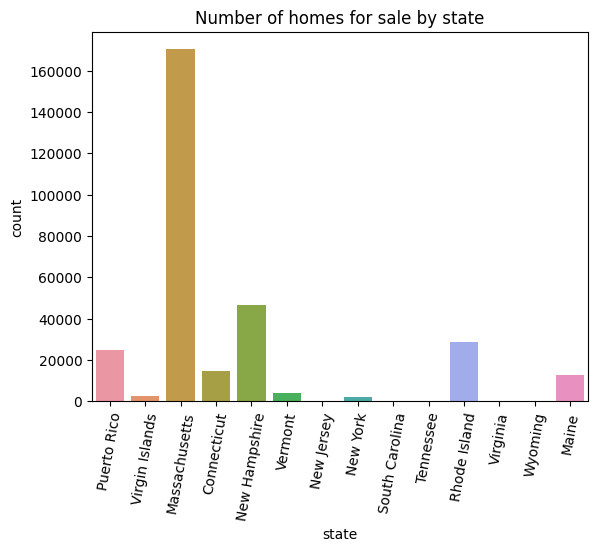

In [ ]:
sns.countplot(data=df, x='state')
plt.xticks(rotation=80)
plt.title("Number of homes for sale by state")